In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import torch
# import torchvision
# import torchvision.transforms as transforms

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 정규화

# #데이터 불러오기, 학습여부  o
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)

# #학습용 셋은 섞어서 뽑기
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
#                                           shuffle=True, num_workers=2)
# #데이터 불러오기, 학습여부  x
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# #테스트 셋은 굳이 섞을 필요가 없음
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)
# #클래스들
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# #이미지 확인하기

# def imshow(img):
#     img = img / 2 + 0.5     # 정규화 해제
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


# # 학습용 이미지 뽑기
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# # 이미지 보여주기
# imshow(torchvision.utils.make_grid(images))

# # 이미지별 라벨 (클래스) 보여주기
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 데이터불러오기
[참고1](https://discuss.pytorch.org/t/runtimeerror-shape-1-400-is-invalid-for-input-of-size/33354)
[참고2](https://howtolivelikehuman.tistory.com/98?category=970191)

In [38]:
from PIL import Image 
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt 
import torch 
from torch.utils.data import Dataset, DataLoader 
import numpy as np 
import torchvision 
from torchvision import transforms 

In [39]:
trans = transforms.Compose([transforms.Resize((100,100)),
 transforms.ToTensor(),
 transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
 ])

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Git/campic_project/학영/data",
                                            transform = trans)

In [40]:
trainset.__getitem__(18)

(tensor([[[-0.3176, -0.3176, -0.2941,  ..., -0.5137, -0.4980, -0.4980],
          [-0.3176, -0.3176, -0.2941,  ..., -0.5137, -0.4980, -0.4980],
          [-0.3490, -0.3490, -0.3255,  ..., -0.5137, -0.4980, -0.4980],
          ...,
          [-0.7961, -0.7961, -0.7647,  ...,  0.7333,  0.7725,  0.7725],
          [-0.8431, -0.8431, -0.8118,  ...,  0.8824,  1.0000,  1.0000],
          [-0.8431, -0.8431, -0.8118,  ...,  0.8824,  1.0000,  1.0000]],
 
         [[ 0.2078,  0.2078,  0.2314,  ..., -0.1686, -0.1608, -0.1608],
          [ 0.2078,  0.2078,  0.2314,  ..., -0.1686, -0.1608, -0.1608],
          [ 0.1686,  0.1686,  0.1843,  ..., -0.1765, -0.1608, -0.1608],
          ...,
          [-0.4196, -0.4196, -0.4039,  ...,  0.6627,  0.7098,  0.7098],
          [-0.4588, -0.4588, -0.4353,  ...,  0.8196,  0.9529,  0.9529],
          [-0.4588, -0.4588, -0.4353,  ...,  0.8196,  0.9529,  0.9529]],
 
         [[-0.4196, -0.4196, -0.3882,  ..., -0.6078, -0.6000, -0.6000],
          [-0.4196, -0.4196,

In [41]:
len(trainset)

4552

In [42]:
classes = trainset.classes
classes

['1', '2', '3', '4', '5', '6']

In [43]:
testset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Git/campic_project/학영/data",
                                            transform = trans)

## GPU 

In [15]:
import torch
torch.cuda.is_available()

True

## DataLoader로 데이터 올리기

- ImageFolder를 통해 불러온 trainset을 DataLoader를 사용하여 Batch형식으로 네트워크에 올리는 과정

In [44]:
trainloader = DataLoader(trainset, 
                         batch_size = 4,
                         shuffle = False, # 원래는 True로 해야 함 
                         num_workers = 2)

In [45]:
testloader = DataLoader(trainset, 
                         batch_size = 4,
                         shuffle = False, # 원래는 True로 해야 함 
                         num_workers = 2)

In [46]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([0, 0, 0, 0])


In [47]:
def imshow(img) : 
  img = img /2 +0.5 
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1,2,0)))
  print(np_img.shape)
  print((np.transpose(np_img,(1,2,0))).shape)

In [48]:
print(images.shape)

torch.Size([4, 3, 100, 100])


(3, 104, 410)
(104, 410, 3)
torch.Size([4, 3, 100, 100])
torch.Size([3, 104, 410])
    1     1     1     1 


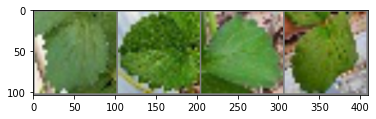

In [49]:
imshow(torchvision.utils.make_grid(images, nrow = 4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(4)))

In [56]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        #input = 3, output = 6, kernal = 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        #kernal = 2, stride = 2, padding = 0 (default)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #input feature, output feature
        self.fc1 = nn.Linear(16 * 22* 22, 120) # 사이즈 맞게 변경 해줬음 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # 값 계산
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # x = x.view(-1, 16 * 5 * 5)
        x= x.view(x.size(0), 16*22*22) # 사이즈 맞게 변경 해줬음 (에러메세지에 나오는 값을 channels = 16, batchsize = 4 로 나누고 루트 씌운 값으로 해준 것 )
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
# net = net.to('cuda')

In [57]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  #데이터셋 2번 받기

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 받기 (데이터 [입력, 라벨(정답)]으로 이루어짐)
        inputs, labels = data
        # 여기서 GPU로 바꿔주기!!!!!!!!!!!!!!!! 
        # inputs, labels = inputs.to('cuda'), labels.to('cuda')
        #학습
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과 출력
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100개마다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

#여기에 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [59]:
#optimizer의 기울기를 0으로 만들기 (변화도가 누적되지 않게 하기 위해)
optimizer.zero_grad()
# output 구하기
outputs = net(inputs)
# loss 계산
loss = criterion(outputs, labels)
#backpropagation (기울기 계산)
loss.backward()
#업데이트
optimizer.step()

(3, 104, 410)
(104, 410, 3)
GroundTruth:      1     1     1     1
Predicted:      6     6     6     6


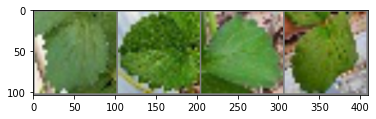

In [60]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 실험용 데이터와 결과 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 학습한 모델로 예측값 뽑아보기
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [61]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 17 %


In [ ]:
.....

## 성능 향상 시켜보기

In [126]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        #input = 3, output = 6, kernal = 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 32, 5)
        #kernal = 2, stride = 2, padding = 0 (default)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 5)
        #input feature, output feature
        self.fc1 = nn.Linear(64 * 9* 9, 192) # 사이즈 맞게 변경 해줬음 
        self.fc2 = nn.Linear(192,128) # 사이즈 맞게 변경 해줬음 
        self.fc3 = nn.Linear(128, 84)
        self.fc4 = nn.Linear(84, 10)

    # 값 계산
    def forward(self, x):
        self.dropout1 = nn.Dropout(p=0.5, inplace=False)



        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = F.relu(self.conv3(x))
        x = self.dropout1(x)
        x = self.pool(x)

        # x = x.view(-1, 64 * 5 * 5)
        x= x.view(x.size(0), 64*9*9) # 사이즈 맞게 변경 해줬음 (에러메세지에 나오는 값을 channels = 16, batchsize = 4 로 나누고 루트 씌운 값으로 해준 것 )
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)
net = Net()
net.to(device)


cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=5184, out_features=192, bias=True)
  (fc2): Linear(in_features=192, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
)

In [127]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [128]:
for epoch in range(10):  #데이터셋 2번 받기

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 받기 (데이터 [입력, 라벨(정답)]으로 이루어짐)
        inputs, labels = data
        # 여기서 GPU로 바꿔주기!!!!!!!!!!!!!!!! 
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        #학습
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과 출력
        running_loss += loss.item()
        if i % 500 == 499:    # print every 100개마다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

#여기에 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,   500] loss: 1.025
[1,  1000] loss: 1.361
[2,   500] loss: 1.436
[2,  1000] loss: 1.378
[3,   500] loss: 1.415
[3,  1000] loss: 1.266
[4,   500] loss: 1.218
[4,  1000] loss: 1.418
[5,   500] loss: 1.104
[5,  1000] loss: 1.143
[6,   500] loss: 0.829
[6,  1000] loss: 1.012
[7,   500] loss: 0.937
[7,  1000] loss: 1.283
[8,   500] loss: 0.938
[8,  1000] loss: 1.011
[9,   500] loss: 0.897
[9,  1000] loss: 0.710
[10,   500] loss: 0.626
[10,  1000] loss: 1.138
Finished Training


In [120]:
20736 / 4

5184.0

In [125]:
5184 / 64

81.0

In [124]:
162 ** (1/2)

12.727922061357855

In [129]:
#optimizer의 기울기를 0으로 만들기 (변화도가 누적되지 않게 하기 위해)
optimizer.zero_grad()
# output 구하기
outputs = net(inputs)
# loss 계산
loss = criterion(outputs, labels)
#backpropagation (기울기 계산)
loss.backward()
#업데이트
optimizer.step()

(3, 104, 410)
(104, 410, 3)
GroundTruth:      1     1     1     1
Predicted:      6     6     6     6


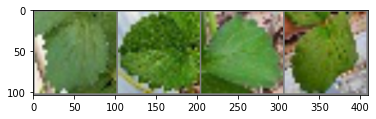

In [130]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 실험용 데이터와 결과 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 학습한 모델로 예측값 뽑아보기
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [131]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 17 %


## 성능 향상을 위해서 해야 할 것 

- 데이터 증강 
- Convolution layer 
  - 필터 사이즈와 필터 개수 
  - stride 값 
  - zero padding 유무 

- Pooling layer 
  - pooling 방식 
  - pool 크기 
  - pool stride 값 

- 활성함수 종류 
- loss function 종류 